In [48]:
import pydot
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


In [49]:
def desenha(df):

    df['Nota'] = (df['Comportamento']+df['Desempenho'])/2

    df.loc[(df['Nota']>-1) & (df['Nota']<=2),'Cor'] = 'red'
    df.loc[(df['Nota']>2) & (df['Nota']<=4),'Cor'] = 'orangered'
    df.loc[(df['Nota']>4) & (df['Nota']<=6),'Cor'] = 'yellow'
    df.loc[(df['Nota']>6) & (df['Nota']<=8),'Cor'] = 'springgreen'
    df.loc[(df['Nota']>8) & (df['Nota']<=10),'Cor'] = 'skyblue'

    graph = pydot.Dot('Estrutura', graph_type='graph',rankdir='TB', bgcolor='white')




    #Cluster nivel + baixo
    cluster = df.loc[df['Cluster'].notna(),'Cluster'].unique()
    py_cluster = []
    for i in range(0,len(cluster)):
        py_cluster.append(pydot.Cluster(cluster[i],
                                        label='',
                                        rankdir='TB',
                                        bgcolor='gray95',
                                        style='"rounded,filled"'))


    #Cluster Escala
    escala = df.loc[df['Escala'].notna(),'Escala'].unique()
    py_escala = []
    for i in range(0,len(escala)):
        py_escala.append(pydot.Cluster(escala[i],
                                       label='',
                                       rankdir='TB',
                                       bgcolor='gray95',
                                       style='"rounded,filled"'))

    #Adiciona os nós


    #Nós sem cluster
    nos = df.loc[~df['Cluster'].notna()]

    for i,row in nos.iterrows():
        id = row['ID']
        label = row['Nome']
        label = row['Texto']

        graph.add_node(pydot.Node(id,
                                  label=label,
                                  fontname='Courier',
                                  fontsize='10',
                                  shape='record',
                                  style='filled',
                                  fillcolor=row['Cor']))

    #Nós com cluster

    cluster = df.loc[df['Cluster'].notna(),'Cluster'].unique()
    for i,value in enumerate(cluster):  
        nos = df.loc[df['Cluster']==value]
        for j,row in nos.iterrows():
            id = row['ID']
            label = row['Nome']
            label = row['Texto']

            py_cluster[i].add_node(pydot.Node(id,
                                      label=label,
                                      fontname='Courier',
                                      fontsize='10',
                                      shape='record',
                                      style='filled',
                                      fillcolor=row['Cor'],
                                      rankdir='TB',))  

        index, = np.where(escala == value.split('/')[0])
        py_escala[index[0]].add_subgraph(py_cluster[i])   

    for i,x in enumerate(py_escala):    
        graph.add_subgraph(py_escala[i])

    #
    # Adicionar os edges
    #

    df_edge = df.loc[df['Edge'].notna()]


    for i,row in df_edge.iterrows():    
        for n in str(row['Edge']).split(';'):
            #print(str(n))
            #print(df_edge['ID'])
            if str(n) in df['ID'].to_list():
                graph.add_edge(pydot.Edge(row['ID'], str(n), color='blue'))


    df_edge = df.loc[df['Edge_dot'].notna()]


    for i,row in df_edge.iterrows():    
        for n in str(row['Edge_dot']).split(';'):
            n = str(int(float(n)))

            #print(df_edge['ID'])
            if str(n) in df['ID'].to_list():
                graph.add_edge(pydot.Edge(row['ID'], str(n), color='blue',style='dotted'))



    from IPython.display import Image,display
    im = Image(graph.create_png())
    display(im)
    
    return None


In [50]:
#Manipula dados
df_o = pd.read_excel(r'Organograma_py.xlsx',
                   sheet_name='Quadro', engine="openpyxl")

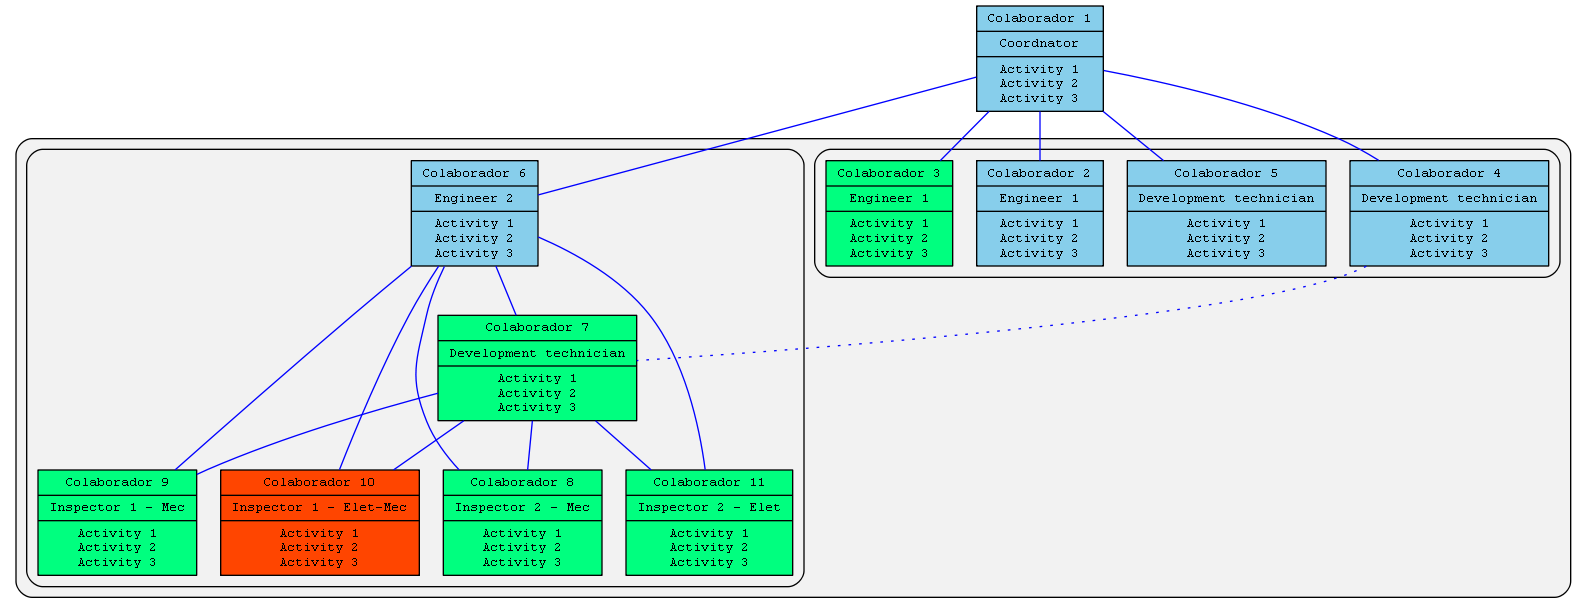

In [51]:
df_o = pd.read_excel(r'Organograma_py.xlsx',
                   sheet_name='Quadro', engine="openpyxl")

df = df_o
df['Texto'] = '{' + df['Nome'] + '|' + df['Posição'] + '|' + df['Atividades'] + '}'
 
df['Cluster'] = df['Escala'] + '/' + df['Posto'] 
df['ID'] = df['ID'].astype(int).apply(str) 
df = df.loc[df['Staff']==1]

desenha(df)
None

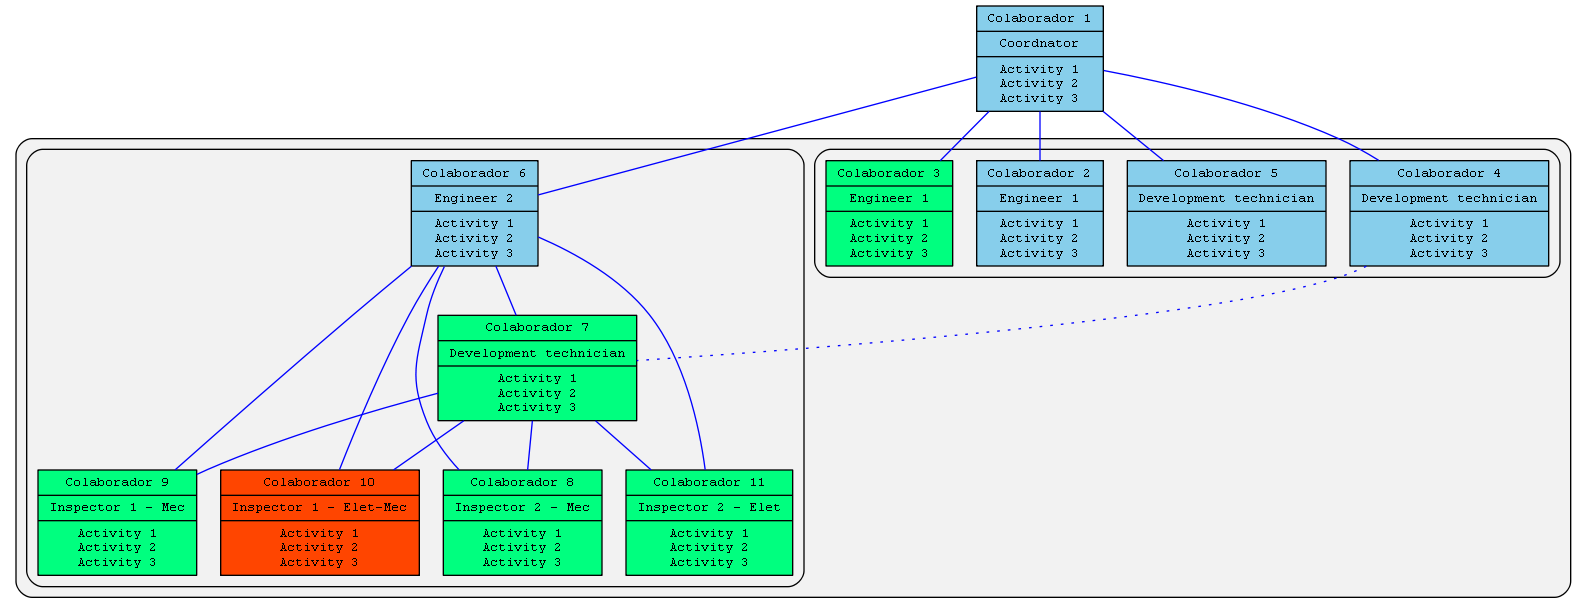

In [52]:
df_o = pd.read_excel(r'Organograma_py.xlsx',
                   sheet_name='Quadro', engine="openpyxl")

df = df_o
df['Texto'] = '{' + df['Nome'] + '|' + df['Posição'] + '|' + df['Atividades'] + '}'
 
df['Cluster'] = df['Escala'] + '/' + df['Posto'] 
df['ID'] = df['ID'].astype(int).apply(str) 
df = df.loc[df['Staff']==1]
df = df.loc[df['Posto']!='Operação']

desenha(df)


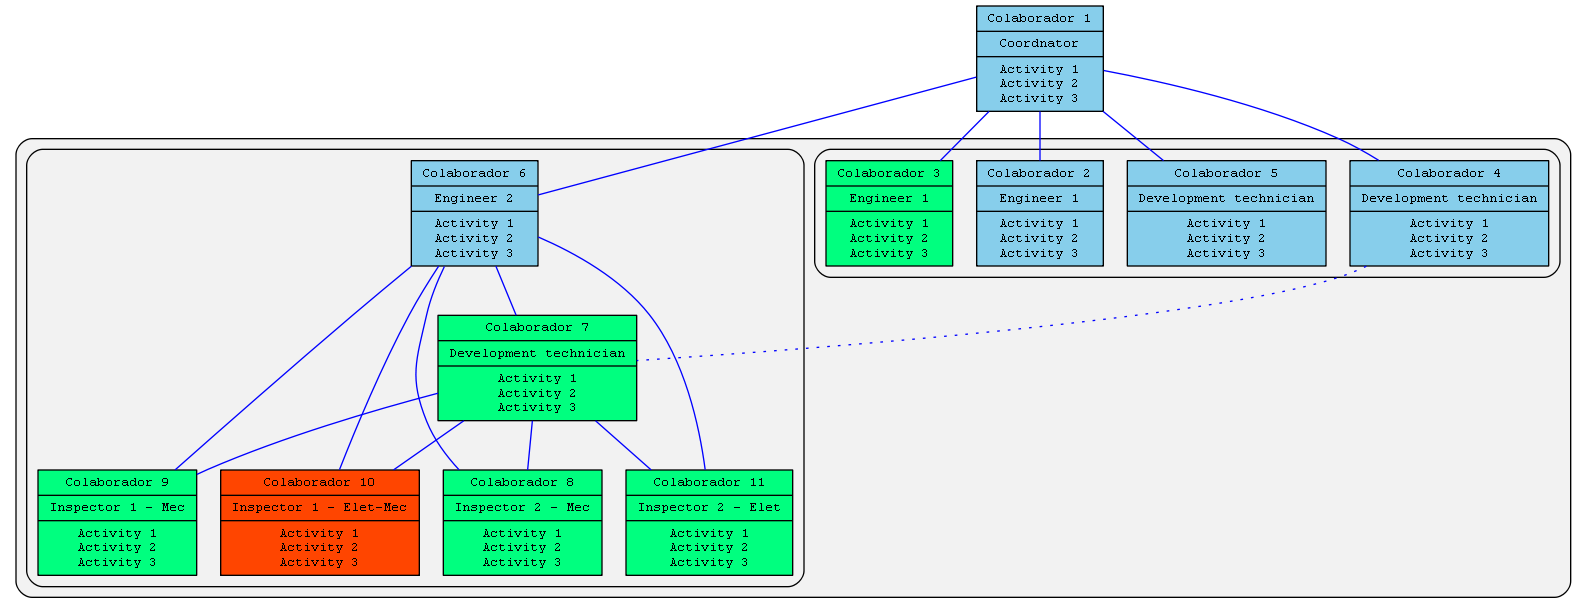

In [53]:
df_o = pd.read_excel(r'Organograma_py.xlsx',
                   sheet_name='Quadro', engine="openpyxl")
df = df_o
df['Texto'] = '{' + df['Nome'] + '|' + df['Posição'] + '|' + df['Atividades'] + '}'
 
df['Cluster'] = df['Escala'] + '/' + df['Posto'] 
df['ID'] = df['ID'].astype(int).apply(str) 
df = df.loc[df['Staff']==1]
df = df.loc[df['Posto']!='Manutenção']

desenha(df)

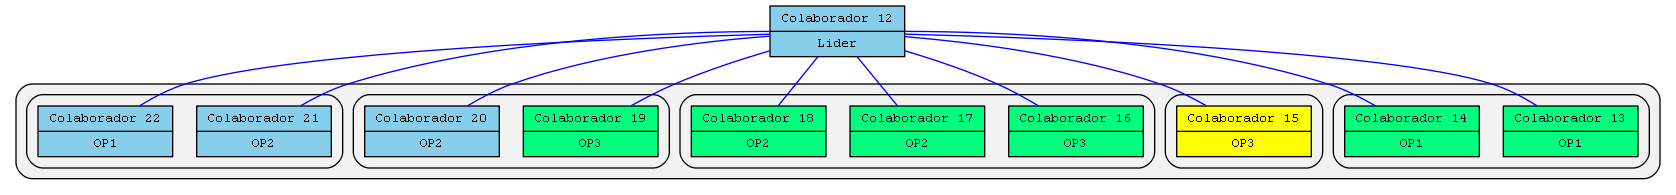

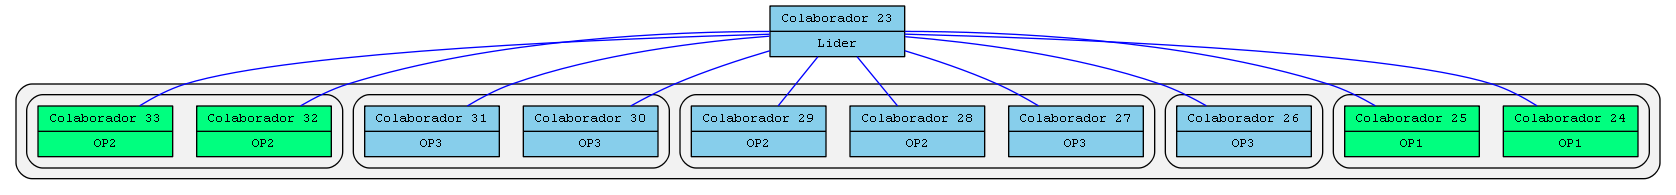

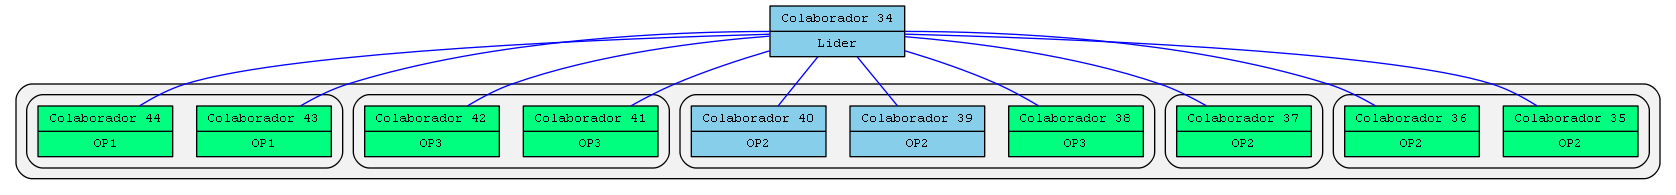

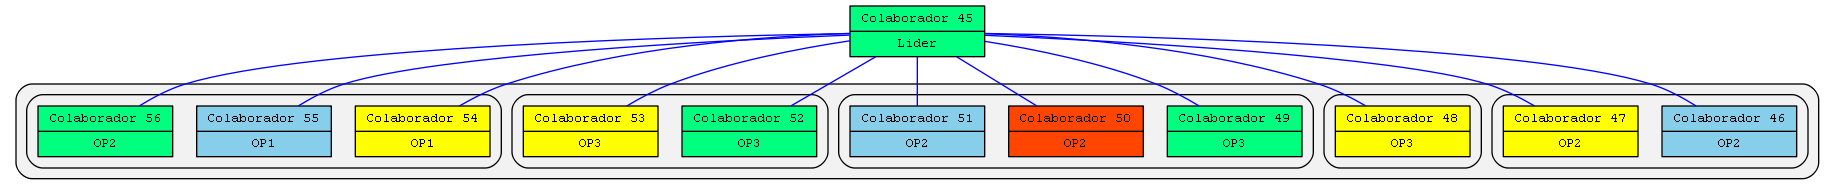

In [55]:
df_o = pd.read_excel(r'Organograma_py.xlsx',
                   sheet_name='Quadro', engine="openpyxl")

df = df_o




df['Texto'] = '{' + df['Nome'] + '|' + df['Posição'] + '}'

df['Cluster'] = df['Escala'] + '/' + df['Posto'] 
df['ID'] = df['ID'].astype(int).apply(str) 
#df = df.loc[df['Staff']==1]
dfa = df.loc[df['Escala']=='Work schedule 1']
dfb = df.loc[df['Escala']=='Work schedule 2']
dfc = df.loc[df['Escala']=='Work schedule 3']
dfd = df.loc[df['Escala']=='Work schedule 4']

desenha(dfa)
desenha(dfb)
desenha(dfc)
desenha(dfd)



In [ ]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]           
    minimo = np.amin(values)
    maximo = np.amax(values)
    normalized = (values - minimo) / (maximo - minimo)
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    
    return np.array(palette).take(indices, axis=0)

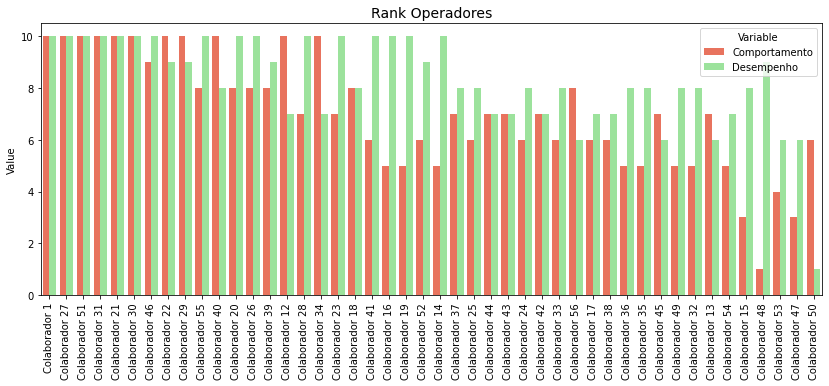

In [56]:
df_o = pd.read_excel(r'Organograma_py.xlsx',
                   sheet_name='Quadro', engine="openpyxl")

df = df_o

df = df.loc[df['Escala']!='Adm']
df = df.loc[df['Nome']!='Bannwart']

df['Pontuacao'] = (df['Desempenho'] + df['Comportamento'])/2
df = df.sort_values(by='Pontuacao',ascending=False)

df = df[['Nome','Comportamento','Desempenho']]
df = df.melt(id_vars='Nome').rename(columns=str.title)

colors = ['tomato', 'lightgreen']
sns.set_palette(sns.color_palette(colors))

f, ax = plt.subplots(figsize=(14,5)) 
sns.barplot(x='Nome',y='Value',hue='Variable',data = df, ax=ax)
plt.xticks(rotation=90, horizontalalignment='center')
ax.set_title('Rank Operadores', fontsize=14)
ax.set_xlabel('', fontsize=12)

None

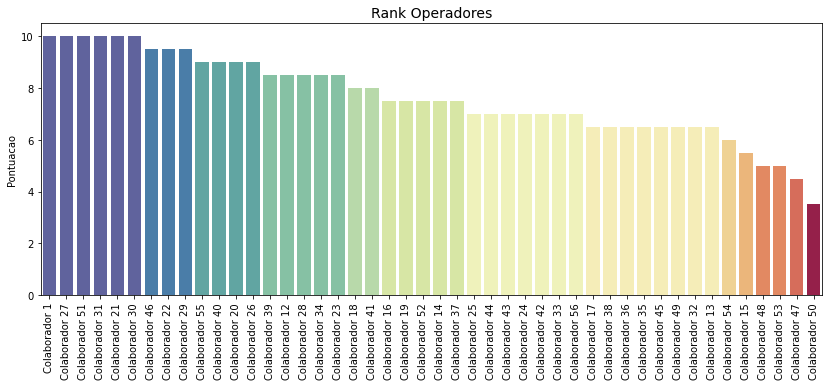

In [57]:
df_o = pd.read_excel(r'Organograma_py.xlsx',
                   sheet_name='Quadro', engine="openpyxl")

df = df_o

df = df.loc[df['Escala']!='Adm']
df = df.loc[df['Nome']!='Bannwart']


df['Pontuacao'] = (df['Desempenho'] + df['Comportamento'])/2
df = df.sort_values(by='Pontuacao',ascending=False)

f, ax = plt.subplots(figsize=(14,5)) 
sns.barplot(x='Nome',y='Pontuacao',data = df, ax=ax,palette = colors_from_values(df['Pontuacao'],'Spectral'))
plt.xticks(rotation=90, horizontalalignment='center')
ax.set_title('Rank Operadores', fontsize=14)
ax.set_xlabel('', fontsize=12)
None


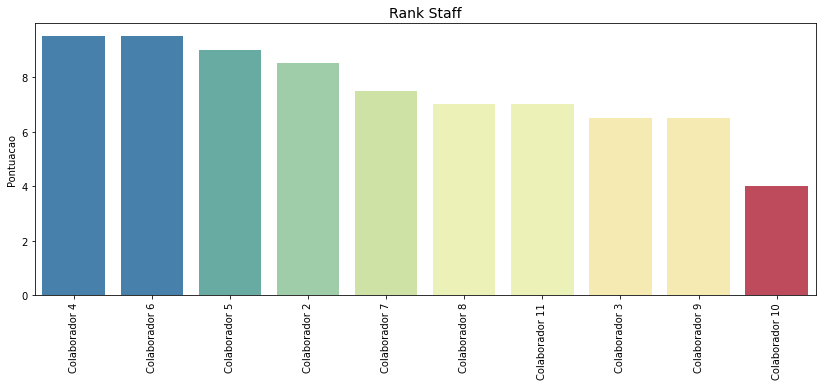

In [59]:
df_o = pd.read_excel(r'Organograma_py.xlsx',
                   sheet_name='Quadro', engine="openpyxl")

df = df_o

df = df.loc[df['Escala']=='Adm']


df['Pontuacao'] = (df['Desempenho'] + df['Comportamento'])/2
df = df.sort_values(by='Pontuacao',ascending=False)

f, ax = plt.subplots(figsize=(14,5)) 
sns.barplot(x='Nome',y='Pontuacao',data = df, ax=ax,palette = colors_from_values(df['Pontuacao'],'Spectral'))
plt.xticks(rotation=90, horizontalalignment='center')
ax.set_title('Rank Staff', fontsize=14)
ax.set_xlabel('', fontsize=12)
None